Testung des Influxes durch MCT1 und PfFNT. Die Zellen wurden zuvor 1:1 verdünnt, da unverdünnt die Grenze der Detektion überschritten wurde.

In [6]:
import sys
sys.path.insert(0, '..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file1 = "1 mM Lactat Influx_MCT1_PfFNT_Zellen1_1_verdünnt.csv"

df1 = pd.read_csv(file1, sep=';', decimal=',', skiprows=36, encoding='latin1')

# Ersetze "OVER" durch NaN in der gesamten DataFrame
df1 = df1.replace('OVER', np.nan)

df1.head()


,Startzeit:,14.11.2025 12:37:57,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zyklus Nr.,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
3,Zeit [s],0,10,20,30,40,50,60,70,80,...,510,520,530,540,550,560,570,580,590,600
4,Temp. [øC],--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [8]:
Kontrolle_Lactat = dataframe1(df1, 3, 5, 6, 7)
MCT1= dataframe1(df1, 3, 8, 9, 10)
PfFNT = dataframe1(df1, 3, 11, 12, 13)
Kontrolle_Lactat.head()
print(MCT1.head())
MCT1["Mittelwerte"] = pd.Series(MCT1[["2.Messung", "3.Messung"]].mean(axis=1).tolist())
MCT1["Standardabweichung"]= pd.Series(MCT1[["2.Messung", "3.Messung"]].std(axis=1).tolist())
print(MCT1.head())

   Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0   0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1  10.0   0.015008   0.023777   0.029894     0.022893            0.007483
2  20.0   0.033602   0.059705   0.049771     0.047693            0.013175
3  30.0   0.043136   0.073119   0.083609     0.066621            0.021004
4  40.0   0.046982   0.088585   0.087019     0.074195            0.023580
   Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0   0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1  10.0   0.015008   0.023777   0.029894     0.026836            0.004326
2  20.0   0.033602   0.059705   0.049771     0.054738            0.007025
3  30.0   0.043136   0.073119   0.083609     0.078364            0.007417
4  40.0   0.046982   0.088585   0.087019     0.087802            0.001107


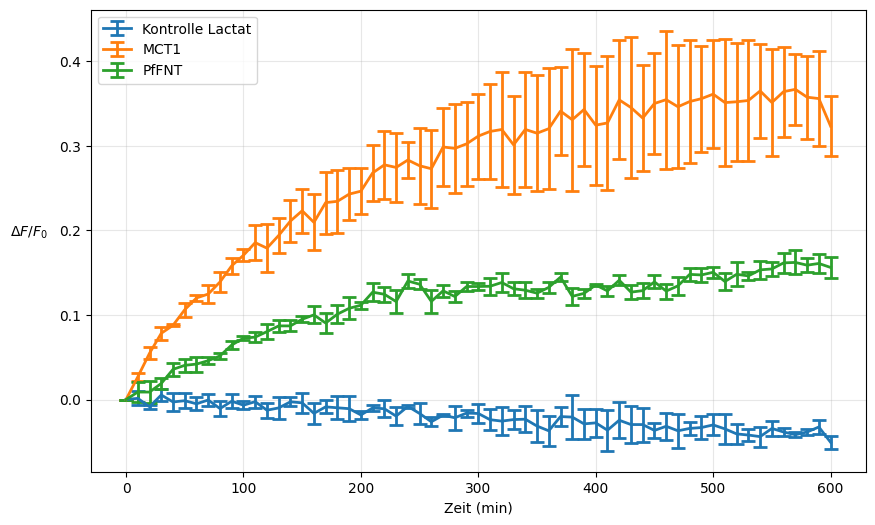

Abbildung gespeichert: ../figueres/MCT1_PfFNT_Influx_1mM_plot.png


In [9]:
import os
outdir = os.path.join('..', 'figueres')
os.makedirs(outdir, exist_ok=True)
filename = os.path.join(outdir, 'MCT1_PfFNT_Influx_1mM_plot.png')
plt.figure(figsize=(10, 6))

# Kontrolle Lactat
plt.errorbar(Kontrolle_Lactat["Time"], Kontrolle_Lactat["Mittelwerte"], 
             yerr=Kontrolle_Lactat["Standardabweichung"],
             label="Kontrolle Lactat", linewidth=2, capsize=5, capthick=2)

# Kontrolle Hepes
plt.errorbar(MCT1["Time"], MCT1["Mittelwerte"],
             yerr=MCT1["Standardabweichung"],
             label="MCT1", linewidth=2, capsize=5, capthick=2)

# MCT1
plt.errorbar(PfFNT["Time"], PfFNT["Mittelwerte"],
             yerr=PfFNT["Standardabweichung"],
             label="PfFNT", linewidth=2, capsize=5, capthick=2)

plt.xlabel("Zeit (min)")
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=18)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)
plt.legend()
plt.grid(True, alpha=0.3)

# Speichere die Abbildung als PNG
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()
print(f"Abbildung gespeichert: {filename}")
